In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

plt.rcParams["font.family"] = "sans-serif"

In [2]:
cd = "C://Users//scottjmk//Dropbox//Research//petra_moser//"

df1 = pd.read_csv(cd+"Replication//Data//MoS1956/MoS1956_Final.csv")

df1 = df1[["unique_id", "firstname", "middlename", "lastname", "birthyear", "gender_clean", "yearofmarriage", "child", "cluster", "see", "vol_num"]]

df2 = df1[df1["gender_clean"] != "unknown"][~df1["birthyear"].isnull()][df1["see"].isnull()][~df1["yearofmarriage"].isnull()]
df2["ageatmarriage"] = df2["yearofmarriage"] - df2["birthyear"]

mothers = df2[df2["gender_clean"] == "female"][~df2["child"].isnull()]
other_women = df2[df2["gender_clean"] == "female"][df2["child"].isnull()]
fathers = df2[df2["gender_clean"] == "male"][~df2["child"].isnull()]
other_men = df2[df2["gender_clean"] == "male"][df2["child"].isnull()]

mothers_ageatmarriage = pd.DataFrame(mothers.groupby("birthyear")["ageatmarriage"].mean()).reset_index()
other_women_ageatmarriage = pd.DataFrame(other_women.groupby("birthyear")["ageatmarriage"].mean()).reset_index()
fathers_ageatmarriage = pd.DataFrame(fathers.groupby("birthyear")["ageatmarriage"].mean()).reset_index()
other_men_ageatmarriage = pd.DataFrame(other_men.groupby("birthyear")["ageatmarriage"].mean()).reset_index()

df3 = pd.read_csv(cd+"Replication//Data//Miscellaneous//Census1960_AgeatMarriage.csv")

C:\Users\scottjmk\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8,9,16,17,18,19,27,28,34,52,53,56,57,60,61,65,68,69,108,109,112,113,116,117,120,121,124,125,128,129,172,176,177,180,181,184,185,189,193,197,201,205,209,213,217,221,225,229,233,237,241,356,360,361,364,365,368,369,372,373,376,377,380,381,384,385,388,389,392,393,396,397,400,401,404,405,408,409,412,413,416,417,420,421,424,425,428,429,432,433,436,437,441,445,449,453,457,461,465,469,472,473,477,480,481,484,485,488,489,492,493,534,535,536,537,538,539,575,576,579,580,583,584,587,588,644,648,651,652,655,656,659,660,663,667,671,675,679,727,728,731,732,735,736,739,740,743,744,747,748,751,752,755,756,759,760,763,764,767,768,771,772,775,776,779,780,783,784,787,788,791,792,795,799,800,803,804,807,808,811,819,820,821,822,823,824,825,826,827,828,843,844,845,846,847,865,898,899,900,901,912,913,914,915,916,917,928,929,930,931,932,933,934,936,937,938,939,940,941,942,943,944,969,970,971,972,973,974,

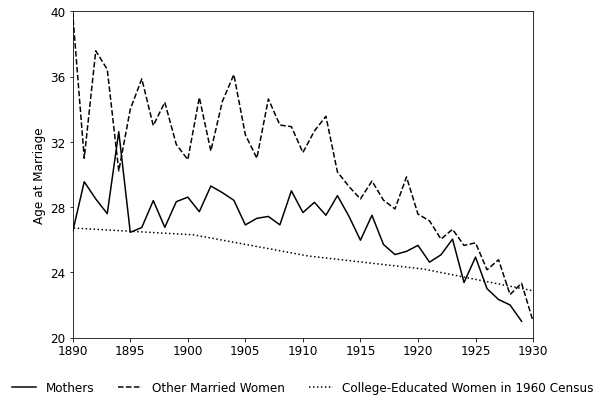

In [3]:
fig, ax1 = plt.subplots(figsize = (8.25, 6))

mothers_ageatmarriage.set_index("birthyear")["ageatmarriage"].plot(ax = ax1, color = "black", linewidth = 1.5, label = "Mothers")
other_women_ageatmarriage.set_index("birthyear")["ageatmarriage"].plot(ax = ax1, color = "black", linewidth = 1.5, linestyle = "--", label = "Other Married Women")
df3.set_index("birthyear")["female_ageatmarriage"].plot(ax = ax1, color = "black", linewidth = 1.5, linestyle = ":", label = "College-Educated Women in 1960 Census")

ax1.set_xlim(1890, 1930)
ax1.set_ylim(20, 40)
ax1.set_xlabel("", fontsize = 12)
ax1.set_ylabel("Age at Marriage", fontsize = 12)
ax1.set_yticks([20, 24, 28, 32, 36, 40])

ax1.legend(loc = "upper center", bbox_to_anchor = (0.50, -0.1), ncol = 3, frameon = False, fontsize = 12)

plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12, rotation = 0)

plt.savefig(cd+"Replication//Output//Figures/FigureA7A.jpg", transparent=False, bbox_inches="tight")

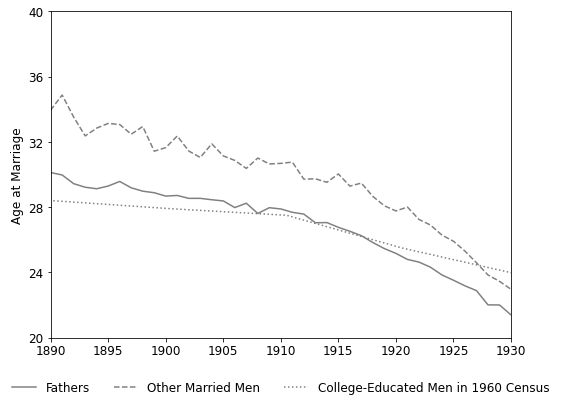

In [4]:
fig, ax1 = plt.subplots(figsize = (8.25, 6))

fathers_ageatmarriage.set_index("birthyear")["ageatmarriage"].plot(ax = ax1, color = "gray", linewidth = 1.5, label = "Fathers")
other_men_ageatmarriage.set_index("birthyear")["ageatmarriage"].plot(ax = ax1, color = "gray", linewidth = 1.5, linestyle = "--", label = "Other Married Men")
df3.set_index("birthyear")["male_ageatmarriage"].plot(ax = ax1, color = "gray", linewidth = 1.5, linestyle = ":", label = "College-Educated Men in 1960 Census")

ax1.set_xlim(1890, 1930)
ax1.set_ylim(20, 40)
ax1.set_xlabel("", fontsize = 12)
ax1.set_ylabel("Age at Marriage", fontsize = 12)
ax1.set_yticks([20, 24, 28, 32, 36, 40])

ax1.legend(loc = "upper center", bbox_to_anchor = (0.50, -0.1), ncol = 3, frameon = False, fontsize = 12)

plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12, rotation = 0)

plt.savefig(cd+"Replication//Output//Figures/FigureA7B.jpg", transparent=False, bbox_inches="tight")